使用不同的SVM Kernels  
https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py

Using Kernel 介紹
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#using-kernels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
## 引資料
iris = datasets.load_iris()
for key,value in iris.items():
    try:
        print (key,value.shape)
    except:
        print (key)

data (150, 4)
target (150,)
frame
target_names (3,)
DESCR
feature_names
filename


In [5]:
X = iris.data
y = iris.target

In [11]:
len(X)

150

In [10]:
len(X[y!=0])

100

In [12]:
X = X[y!=0,:2]
y = y[y != 0]

In [18]:
n_sample = len(X)

In [20]:
np.random.seed(0)

In [21]:
order = np.random.permutation(n_sample)

In [23]:
X = X[order]
y = y[order].astype(float)

In [30]:
X_train = X[:int(.9*n_sample)]
y_train = y[:int(.9*n_sample)]
X_test = X[int(.9*n_sample):]
y_test = y[int(.9*n_sample):]

<ipython-input-31-1935333a609e>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-31-1935333a609e>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
<ipython-input-31-1935333a609e>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals

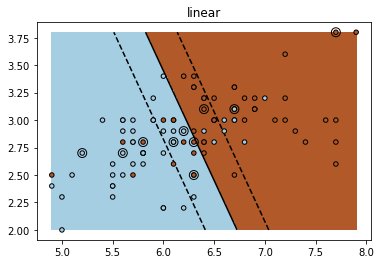

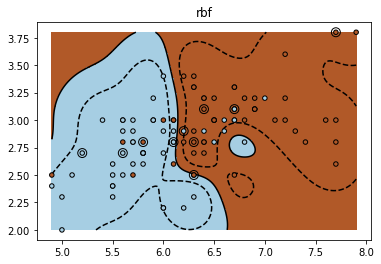

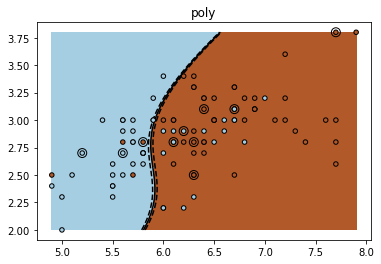

In [31]:
# 模型 fit the model
for kernel in ('linear','rbf','poly'):
    clf = svm.SVC(kernel=kernel,gamma=10)
    clf.fit(X_train,y_train)
    
    plt.figure()
    plt.clf()
    plt.scatter(X[:,0],X[:,1],c=y,zorder=10,cmap=plt.cm.Paired,edgecolors='k',s=20)
    
    # Circle out the test data
    plt.scatter(X_test[:,0],X_test[:,1],s=80, facecolors='none',zorder=10,edgecolors='k')
    
    plt.axis('tight')
    x_min = X[:,0].min()
    x_max = X[:,0].max()
    y_min = X[:,1].min()
    y_max = X[:,1].max()
    
    XX,YY = np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k','k','k'],linestyles=['--','-','--'],levels=[-.5,0,.5])
    
    plt.title(kernel)
plt.show()